In [1]:
import Aluminum

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import itertools
import os

print(Aluminum.pseudo_name_list)

['Al.rel-pbe-paw.UPF', 'Al.rel-pbesol-uspp.UPF', 'Al.pz-vbc.UPF', 'Al.pbe-uspp.UPF']


In [5]:
import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
#     'font.size' : 14.4,
    'font.size' : 17.28,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

%matplotlib notebook

# Surface relaxation

In [10]:
work_dir = 'surface'

# pseudo_name = Aluminum.pseudo_name_list[-2]
# a_0 = 7.46834

pseudo_name = Aluminum.pseudo_name_list[-1]
a_0 = 7.624231

n_layers = 9
df = Aluminum.make_surface_df_template(n_layers)

vacuum_thickness_s = np.arange(10,34,2)
# vacuum_thickness = 18

# n_k_points_hor_s = np.arange(8,20,2)
# n_k_points_hor_s = [10,11,12]
n_k_points_hor = 14

# ecutwfc_s = np.arange(10,40,5)
ecutwfc = 20

# n_k_points_ver_s = np.arange(1,6)
n_k_points_ver = 1

ecutrho_r = 4
degauss = 0.02
mixing_beta = 0.7
conv_thr_o = -6

k_points_shift = '1 1 0'

for vacuum_thickness in tqdm(vacuum_thickness_s):
# for n_k_points_hor in tqdm(n_k_points_hor_s):
# for n_k_points_ver in tqdm(n_k_points_ver_s):
# for ecutwfc in tqdm(ecutwfc_s):
    es,a_cs,t = Aluminum.surface_sim_relax(work_dir=work_dir,a_0=a_0,n_layers=n_layers,
                                           save_df=df,vacuum_thickness=vacuum_thickness,
                                           ecutwfc=ecutwfc,ecutrho_r=ecutrho_r,degauss=degauss,
                                           mixing_beta=mixing_beta,conv_thr_o=conv_thr_o,
                                           n_k_points_hor=n_k_points_hor,n_k_points_ver=n_k_points_ver,
                                           k_points_shift=k_points_shift)

df.to_csv(work_dir+'/n_l%d_rel_optimizing_vacuum_nk14.csv' %n_layers,index=False)
# df.to_csv(work_dir+'/n_l%d_rel_optimizing_n_k_hor_vac18.csv' %n_layers,index=False)
# df.to_csv(work_dir+'/n_l%d_optimizing_ecutwfc.csv' %n_layers,index=False)
# df.to_csv(work_dir+'/n_l%d_optimizing_n_k_ver.csv' %n_layers,index=False)

os.system('play -nq -t alsa synth 0.5 sine 440')
os.system('play -nq -t alsa synth 1 sine 375')

100%|██████████| 12/12 [2:09:39<00:00, 725.52s/it]


0

In [21]:
df = pd.read_csv('surface/n_l5_optimizing_n_k_hor_vac18.csv')

In [12]:
df.keys()

Index(['pseudo_name', 'a_0', 'vacuum_thickness', 'n_layers', 'ecutwfc',
       'ecutrho_r', 'degauss', 'mixing_beta', 'conv_thr_o', 'n_k_points_hor',
       'n_k_points_ver', 'k_point_shift', 'total_energy', 'n_it', 'sim_time',
       'z1', 'z2', 'z3', 'z4', 'z5'],
      dtype='object')

In [10]:
df['ecutwfc']

0     20
1     20
2     20
3     20
4     20
5     20
6     20
7     20
8     20
9     20
10    20
11    20
Name: ecutwfc, dtype: int64

In [9]:
df1 = pd.read_csv('surface/n_l11_rel_optimizing_vacuum_nk14.csv')
df2 = pd.read_csv('surface/n_l11_optimizing_vacuum_nk16.csv')

<IPython.core.display.Javascript object>


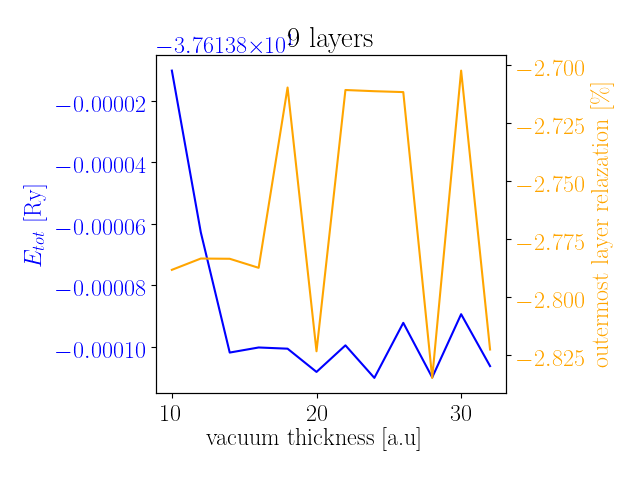

In [11]:
plot_time = False

linestyles = ['solid','dashed']
dfs = [df]

key = 'vacuum_thickness'
name = 'n_l%d_rel_vacuum' %n_layers

# key = 'n_k_points_hor'
# name = 'n_l%d_rel_n_k_hor_vac18' %n_layers

# key = 'ecutwfc'
# name = 'n_l%d_ecutwfc' %n_layers

# key = 'n_k_points_ver'
# name = 'n_l%d_n_k_ver' %n_layers

fig,ax = plt.subplots()
if key == 'vacuum_thickness':
    ax.set_xlabel('vacuum thickness [a.u]')
if key == 'n_k_points_hor':
    ax.set_xlabel('horizontal n k points')
if key == 'ecutwfc':
    ax.set_xlabel('ecutwfc [Ry]')
if key == 'n_k_points_ver':
    ax.set_xlabel('vertical n k points')

color = 'blue'
for i,df in enumerate(dfs):
    ax.plot(df[key],df['total_energy'],color=color,linestyle=linestyles[i])
ax.set_ylabel('$E_{tot}$ [Ry]',color=color)
ax.tick_params(axis='y',labelcolor=color)

ax2 = ax.twinx()
color = 'orange'
if plot_time:
    ax2.plot(df[key],df['sim_time'],color=color)
    ax2.set_ylabel('simulation time [s]',color=color)
else:
    for i,df in enumerate(dfs):
        ax2.plot(df[key],((np.array(df['z2']) - np.array(df['z1']))*np.sqrt(2) - 1)*100,
                 color=color,linestyle=linestyles[i])
    ax2.set_ylabel('outermost layer relazation [\%]',color=color)
ax2.tick_params(axis='y',labelcolor=color)

ax.xaxis.set_label_coords(0.45,-0.1)
ax.set_title('%d layers' %df['n_layers'][0])

fig.tight_layout()

fig.savefig('report/img/%s.pgf' %name)
fig.savefig('report/img/%s.png' %name)

In [16]:
n_layers = 9
n_k_points_hor = 14
vacuum_thickness = 16
ecutwfc = 20
mixing_beta = 0.5

name = 'al-nl%d_rel' %n_layers

es_2,a_cs_2,t = Aluminum.surface_sim_relax(work_dir=work_dir,a_0=a_0,n_layers=n_layers,
                                       vacuum_thickness=vacuum_thickness,name=name,
                                       ecutwfc=ecutwfc,ecutrho_r=ecutrho_r,degauss=degauss,
                                       mixing_beta=mixing_beta,conv_thr_o=conv_thr_o,
                                       n_k_points_hor=n_k_points_hor,n_k_points_ver=n_k_points_ver,
                                       k_points_shift=k_points_shift)

os.system('play -nq -t alsa synth 0.5 sine 440')
os.system('play -nq -t alsa synth 1 sine 375')

0

In [14]:
for atom_index in [0,1,2,3,4]:
    print(atom_index,((a_cs[-1,atom_index + 1,2] - a_cs[-1,atom_index,2])*np.sqrt(2) - 1)*100)

0 -2.787227178542351
1 -4.027189590624913
2 -2.257572365486349
3 -3.933538190635655
4 -3.9339018556532213


<IPython.core.display.Javascript object>


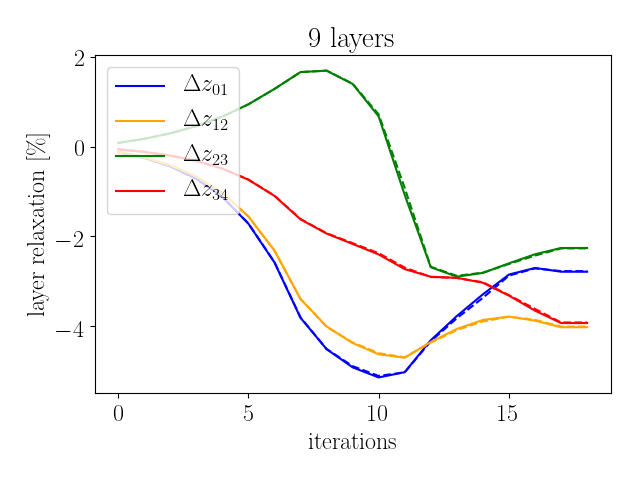

In [17]:
name = 'n_l%d_rel_relaxation_nk14' %n_layers

colors = ['blue','orange','green','red','purple','brown']

fig,ax = plt.subplots()

for i in [0,1,2,3]:
    plt.plot(np.arange(len(es)),((a_cs[:,i+1,2] - a_cs[:,i,2])*np.sqrt(2) - 1)*100,
             label='$\Delta z_{%d%d}$' %(i,i+1),color=colors[i])
    plt.plot(np.arange(len(es_2)),((a_cs_2[:,i+1,2] - a_cs_2[:,i,2])*np.sqrt(2) - 1)*100,
             linestyle='dashed',color=colors[i])
plt.legend(loc='upper left')
plt.title('%d layers' %n_layers)
plt.xlabel('iterations')
plt.ylabel('layer relaxation [\%]')

fig.tight_layout()

# fig.savefig('report/img/%s.pgf' %name)
# fig.savefig('report/img/%s.png' %name)

5 layers:

    vacuum_thickness = 25
    ecutwfc = 20
    n_k_hor = 12
    n_k_ver = 1
    degauss = 0.02
    
    Delta_z_01 = 1.846
    Delta_z_12 = 3.571
    
    vacuum_thickness = 18
    ecutwfc = 20
    n_k_hor = 10
    n_k_ver = 1
    degauss = 0.02
    
    Delta_z_01 = 4.234
    Delta_z_12 = 0.898
    
7 layers:
    
    vacuum_thickness = 18
    ecutwfc = 20
    n_k_hor = 16
    n_k_ver = 1
    degauss = 0.02
    
    Delta_z_01 = 1.14
    Delta_z_12 = 0.77
    Delta_z_23 = -1.12
    
9 layers:
    
    vacuum_thickness = 18
    ecutwfc = 20
    n_k_hor = 12
    n_k_ver = 1
    degauss = 0.02
    
    Delta_z_01 = 1.24
    Delta_z_12 = 0.903
    Delta_z_23 = 0.025
    Delta_z_34 = -0.99
    
    rel
    vacuum_thickness = 16
    n_k_hor = 14
    
    Delta_z_01 = -2.79
    Delta_z_12 = -4.03
    Delta_z_23 = -2.26
    Delta_z_34 = -3.93

11 layers:

    vacuum_thickness = 18, 15
    ecutwfc = 20
    n_k_hor = 16
    n_k_ver = 1
    degauss = 0.02
    
    Delta_z_01 = 2.04, 1.82
    Delta_z_12 = 0.860, 1.34
    Delta_z_23 = -0.201, 0.248
    Delta_z_34 = -0.797, -0.556
    Delta_z_45 = 0.248, -0.131
    
    
    vacuum_thickness = 18
    ecutwfc = 20
    n_k_hor = 14
    n_k_ver = 1
    degauss = 0.02
    
    Delta_z_01 = 1.66
    Delta_z_12 = -0.02
    Delta_z_23 = -0.42
    Delta_z_34 = 0.56
    Delta_z_45 = -0.39
    
    
    
    paper data:
    vacuum_thickness = 16
    ecutwfc = 12.5
    n_k_hor = 8
    n_k_ver = 1
    degauss = 0.02
    
    Delta_z_01 = 0.547
    Delta_z_12 = 4.34
    Delta_z_23 = 1.58
    Delta_z_34 = 3.09
    Delta_z_45 = 2.36